#### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Load Dataset

In [5]:
df = tf.keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = df.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
labels = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print('Train Image Shape :', train_images.shape)
print('Train Label Shape :', len(train_labels))
print('Test Image Shape :', test_images.shape)
print('Test Label Shape :', len(test_labels))

Train Image Shape : (60000, 28, 28)
Train Label Shape : 60000
Test Image Shape : (10000, 28, 28)
Test Label Shape : 10000


In [59]:
def show_image(index = 0, height = 3, width = 3, data_images = train_images, data_labels = train_labels):
  plt.figure(figsize = (height, width))
  plt.imshow(data_images[index])
  plt.colorbar()
  plt.grid(False)
  plt.xlabel(labels[data_labels[index]])
  plt.show()

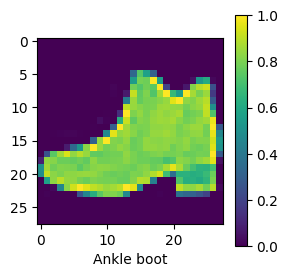

In [60]:
show_image(index = 15)

#### Data Normalization

In [27]:
train_images = train_images / 255.
test_images = test_images / 255.

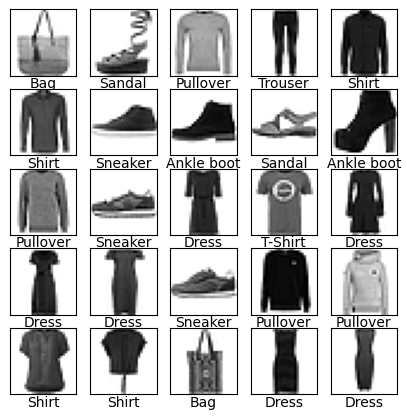

In [40]:
plt.figure(figsize = (5, 5))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i + 35], cmap = plt.cm.binary)
  plt.xlabel(labels[train_labels[i + 35]], loc = 'center', labelpad = 0.5)
plt.show()

#### Architecture

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(len(labels), activation = 'softmax')
])

In [45]:
# help to print the scope of function

? tf.keras.Sequential

In [46]:
? tf.keras.layers.Flatten

In [ ]:
tf.keras.layers.Dense

#### Loss Function Optimizer

In [47]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [48]:
model.compile(optimizer = opt, 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics= ['accuracy'])

In [49]:
? tf.keras.losses.SparseCategoricalCrossentropy

#### Training Image Set

In [50]:
train_data = model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 6s 2ms/step - loss: 0.7875 - accuracy: 0.7328
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5108 - accuracy: 0.8223
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4619 - accuracy: 0.8382
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4332 - accuracy: 0.8479
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4142 - accuracy: 0.8543
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3984 - accuracy: 0.8588
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3850 - accuracy: 0.8631
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8677
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3639 - accuracy: 0.8712
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3563 - accurac

#### Testing Image Set

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('Testing Accuracy : ', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.3898 - accuracy: 0.8616 - 1s/epoch - 3ms/step
Testing Accuracy :  0.8615999817848206


In [53]:
print(train_data.history.keys())

dict_keys(['loss', 'accuracy'])


313/313 [==============================] - 0s 1ms/step
[9.3879411e-03 9.8770314e-01 9.3638511e-05 5.3410407e-04 2.0462999e-03
 9.1163086e-09 2.0241452e-04 3.4041810e-07 3.1785123e-05 2.2545454e-07]


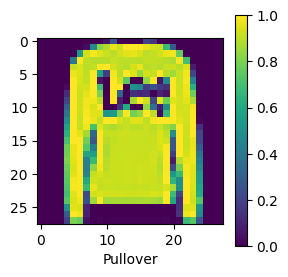

In [62]:
pred = model.predict(test_images)
print(pred[5])
idx = np.argmax(pred[5])
show_image(index = idx, height = 3, width = 3, data_images = test_images, data_labels = test_labels)

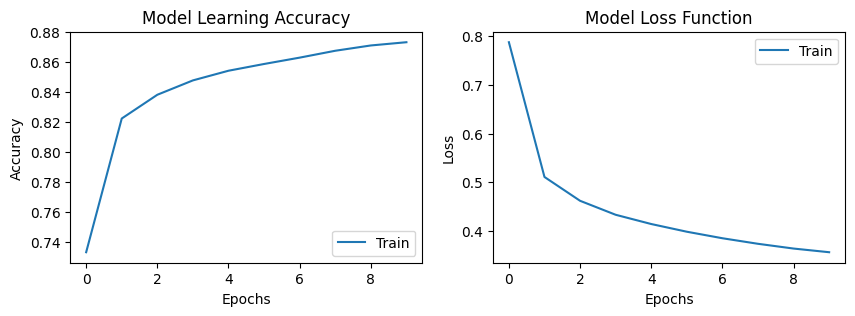

In [86]:
plt.figure(figsize = (10, 3))
plt.subplot(1,2,1)
plt.plot(train_data.history['accuracy'])
plt.title('Model Learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc = 'lower right')


plt.subplot(1,2,2)
plt.plot(train_data.history['loss'])
plt.title('Model Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc = 'upper right')
plt.show()